# Introduction to Deep Learning with Keras

Keras is a high level API for Tensorflow which makes it a lot easier to program neural networks.

$\rightarrow$ the official tensorflow documentation: https://www.tensorflow.org/overview/

$\rightarrow$ the official keras documentation: https://keras.io/


In [5]:
import tensorflow.keras as k
import matplotlib.pyplot as plt

First we´re going to load our dataset:

Label:  9 

Training image: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0 

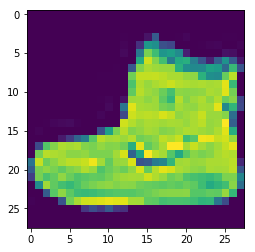

In [6]:
fashion_mnist = k.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()


print("Label: ", training_labels[0], "\n")
print("Training image: \n", training_images[0], "\n")

plt.imshow(training_images[0])

We normalize the input data and reformat the labels:

In [62]:
# normalize input data (map into [0,1])
training_images = training_images / 255.0
test_images = test_images / 255.0

# reformat the labels
from tensorflow.keras.utils import to_categorical
training_labels = to_categorical(training_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

print("Label: ", training_labels[0], "\n")
print("Training image: \n", training_images[0], "\n")

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 

Training image: 
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.    

Next, we specify the architecture of the net. The first layer in this network, k.layers.Flatten, transforms the format of the images from a 2d-array of 28 * 28 pixels to a 1d-array of 28 * 28 = 784 pixels. This layer only reformats the data and has no parameters to learn. The second and third layers, k.layers.Dense, are fully connected layers.

In [63]:
model = k.models.Sequential([
        k.layers.Flatten(input_shape=(28,28)),    
        k.layers.Dense(56, activation = tf.nn.sigmoid),
        k.layers.Dense(10, activation=tf.nn.sigmoid)
        ])


Now, we define the loss function, metrics and which optimizer we want to use. If we call the optimizers by name, the default values (e.g. for the learning rate) are used.

In [65]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
              )


# model.compile(optimizer = k.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
#              loss = 'categorical_crossentropy',
#              metrics=['accuracy']
#              )

Finally, we can train our model:

In [66]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 1.7589 - acc: 0.5866
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 1.0186 - acc: 0.7164
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.7896 - acc: 0.7507
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6893 - acc: 0.7714
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6301 - acc: 0.7873


Let´s look how the net performs on the test data:

In [68]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.6273 - acc: 0.7843
